<h1 align = 'center'> Startup Weekend - Artificial Intelligence Bootcamp </h1>
<h2 align='center'>A Taste of Data Science & Machine Learning </h2>

<img height=400px width=400px align = 'center' src = "http://communities.techstars.com/images/logos/swe_lockup_logo.png">
<br>

Welcome to the hands on session! Let's start by importing some libraries that we will make use of throughout the notebook.

In [1]:
import numpy as np # Linear algebra
import seaborn as sns # Styling our plots
import matplotlib.pyplot as plt # Plotting interface
# Plotting in notebook
%matplotlib inline 

### Optimizing Functions with Gradient Descent

In this section, we will get to implement the gradient descent algorithm in order to minimize a function. 

As an exercise, we want find the minimimum of the 1d function  $ f(\theta) = \theta^2 $. We start from point $\theta_0 = 4.0$ with $f(\theta_0) = 4^2 = 16$. Let's draw a graph of $f(\theta)$ to illustrate the problem.

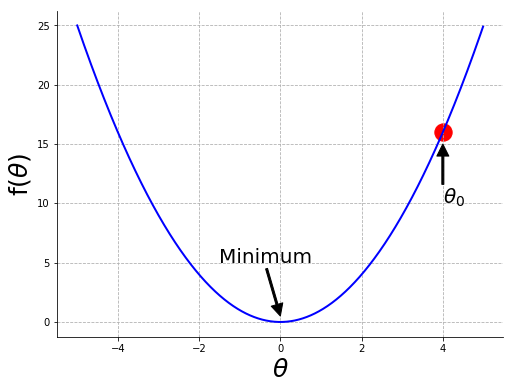

In [2]:
theta_values = np.arange(-5.0, 5.0,0.01)

# define the function
def f(theta):
    return theta**2

f_thetas = f(theta_values)

fig, ax = plt.subplots(figsize=(8,6))
for direc in ['right','top']:
    ax.spines[direc].set_visible(False)

ax.plot(theta_values, f_thetas, lw=2, color='blue')
ax.scatter([4], f(np.array([4])), color='red', s=300)
ax.grid(ls='--')
ax.set_xlabel(r'$\theta$', fontsize=25)
ax.set_ylabel(r'f($\theta$)', fontsize=25)
ax.annotate(s='Minimum', xy=(0,0.5), xytext=(-1.5,5), 
            fontsize=20,  arrowprops = dict(facecolor='black', width=2))
ax.annotate(s=r'$\theta_0$', xy=(4,15), xytext=(4,10),
            fontsize=20, arrowprops = dict(facecolor='black', width=2) )
plt.show()

The derivative of $f(\theta)$ is given by:

$$ f'(\theta)= \dfrac{df}{d\theta} = 2\theta $$

Remember that gradient descent updates the value of theta for a certain number of epochs according to: <br> $$ \theta = \theta - \alpha \dfrac{df}{d\theta} $$

Complete the following code snippets in order to implement the gradient descent algorithm.

In [3]:
def perform_descent(theta, df, alpha):
    # TO DO: implement the gradient descent step
    # return the updated theta value
    return theta - alpha* df
#     pass

def find_theta_min(theta0 , df, alpha, epochs):
    """
    Parameters
    ----------
    
    theta0: Initial theta value    
    df: derivative of the function to minimize
    alpha: learning rate
    epochs: number of epochs
    """
    #TO DO: implement a for loop to repeat gradient descent for a number epochs times
    # return the final obtained theta value 
    theta = theta0
    for i in range(epochs):
        theta = perform_descent(theta, df(theta), alpha)
    return theta
#     pass

In [5]:
def df(theta):
    # TO DO Define the function df (f derivative)
    return 2*theta
#     pass

theta0 = np.array([4])
theta_min  = find_theta_min(theta0, df, alpha = 0.1, epochs=50)
print("Theta min is: ",theta_min)
print("The minimum of f is: ",f(theta_min))

Theta min is:  [  5.70899077e-05]
The minimum of f is:  [  3.25925756e-09]


### Linear Regression

Now it's time to learn how to perform linear regression. We will analyze the Boston housing dataset loaded in the cell below.

In [7]:
from sklearn.datasets import load_boston # load the boston housing dataset
import pandas as pd

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target

# print a description of the dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Let's go ahead and plot the median house price (MEDV) as a function of the average number of rooms in a house (RM).

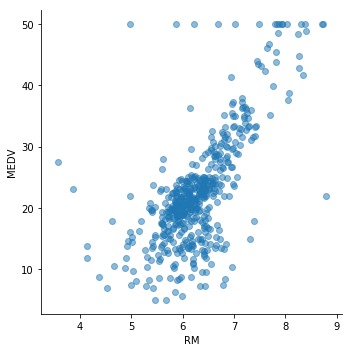

In [8]:
sns.lmplot(x='RM', y='MEDV', data=df, fit_reg=False, scatter_kws=dict(alpha=0.5))
plt.show()

It appears that there is a linear relation between MEDV and RM. Let's implement a linear regression model to capture this relationship.To do so, we will split the dataset into train and test sets. The model is first fitted on the training set and then evaluated on the test set.

Training score:  0.514050661356


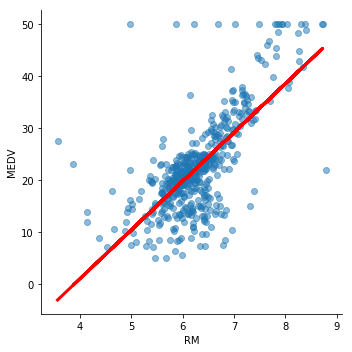

In [9]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression
# Import the function train_test_split
from sklearn.model_selection import train_test_split

# Define the feature(s) X and the target y
X  = df['RM'].values.reshape(-1,1)
y  = df['MEDV']

# TO DO: Split the dataset into a train and a test set using the function
# train_test_split.Use 80 % of the data to train and 20% to test
# Check the documentation of this function to do so
# Set the parameter random_state = 123 in this function to obtain reproducible
# results
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

# TO DO: Instantiate a LinearRegression model and name it lr then fit it to the 
# training set
# Use the .fit() method to fit the model and the .predict() method to predict the labels
# of the training set then assign your predictions to the array y_train_pred

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

#Evaluate the model  on the training set
train_score = lr.score(X_train,y_train)
print("Training score: ", train_score)

sns.lmplot(x='RM', y='MEDV', data=df, fit_reg=False, scatter_kws=dict(alpha=0.5))
plt.plot(X_train, y_pred, color='red', lw=3)
#plt.legend(loc='upper right', bbox_to_anchor = (1.1,1.1))
plt.show()

Evaluate the model on the test set using the method .score() of the lr instance.

In [10]:
lr.score(X_test, y_test)

0.35345519167057704

Clearly, the model performs worse on unseen data points. This illustrates the problem of overfitting. We'll learn more about it in a following section.

**Note**: In case you are interested in the implementation of a simple version linear regression using  gradient descent from scratch, kindly refer to the  <a href='https://github.com/eliekawerk/Lebanon_AI_meetup/tree/master/Linear_Regression_27_Apr_17'>link of the slides and  notebooks </a> of the AI meetup held on the 17$^{th}$ of April 2017.

### Logistic Regression

In this section we will learn how to fit a logistic regression model to solve a classification problem. Consider the toy dataset defined in the cell below.

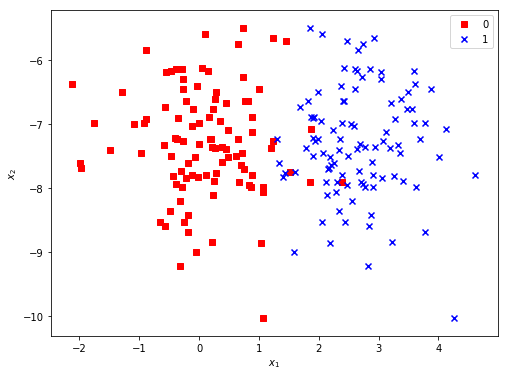

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=2, cluster_std=0.8, random_state=125)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0,0], X[y==1,1], c='red', marker='s', label='0')
plt.scatter(X[y==1,0], X[y==1,1], c='blue', marker='x', label='1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

Our task is to find a model that well separates the two classes 0 (negative) and 1 (positive). Let's define a plotting helper function as follows.

In [12]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

Training score:  0.975
Test score:  0.95


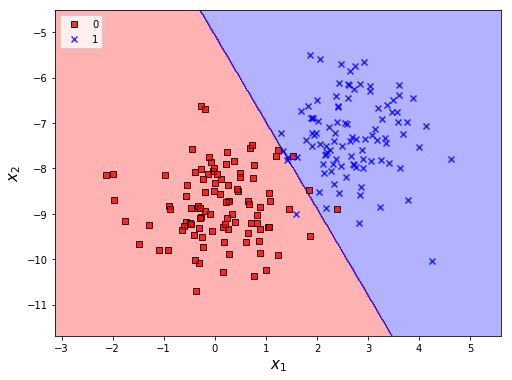

In [14]:
from sklearn.linear_model import LogisticRegression

# TO DO: Split the data intro train and test sets just as we did in the last step
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

# TO DO: Instatiate a Logistic Regression model and call it log_reg; 
# set the parameter C = 1000.0 
# The C parameter will be discussed in a following section
# Fit the model to X_train and y_train using the .fit() method
log_reg = LogisticRegression(C=1000.0, random_state=123)
log_reg.fit(X_train,y_train)

# Evaluate the model on both the training and test sets 
# using the .score() method of log_reg, then print the results
train_score = log_reg.score(X_train,y_train)
print("Training score: ",train_score)
test_score = log_reg.score(X_test, y_test)
print("Test score: ", test_score)

# TO DO: call the plot_decision_regions() function with the corresponding parameters
# in order to visualize the obtained decision regions on the whole dataset.
plot_decision_regions(X,y, log_reg)

plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.show()

### Overfitting and Regularization

Overfitting describes the fact that a model performs well on the training set but fails to generalize on unseen data points. Let's illustrate overfitting with the following code snippet.

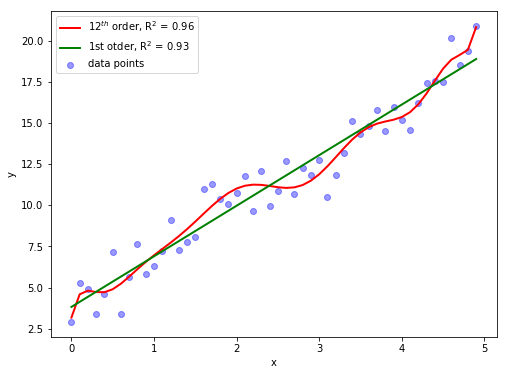

Out of sample performance
------------
First order R2: 0.747421949494
12th order R2: 0.729665184157


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(123)
X = np.arange(0,5, 0.1)
X_test = np.arange(1.15, 3.20, 0.1)

np.random.seed(123)
def f(X):
     return 3*X  + 4 + np.random.randn(len(X)) 

y = f(X)    
y_test = f(X_test)

degree = 12
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X.reshape(-1,1))
lr_poly = LinearRegression().fit(X_poly,y)
y_pred_poly = lr_poly.predict(X_poly)

lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)
y_pred = lr.predict(X.reshape(-1,1))

plt.figure(figsize=(8,6))
plt.scatter(X,y, color='blue', alpha=0.4, label='data points')
plt.plot(X, y_pred_poly, lw = 2, color='red' ,\
         label=str(degree)+r'$^{th}$ order, R$^2$ = %.2f' %lr_poly.score(X_poly, y))
plt.plot(X, y_pred, lw = 2,  color='green',\
         label='1st otder, R$^2$ = %.2f' %lr.score(X.reshape(-1,1), y))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("Out of sample performance")
print("-"*12)
print(r"First order R2:",lr.score(X_test.reshape(-1,1), y_test))
print(str(degree) + r"th order R2:",\
      lr_poly.score(poly.transform(X_test.reshape(-1,1)),y_test))

The first order model performs better than the 12$^{th}$ order model. Let's define an L2 penalized model (called Ridge) whose cost function is defined as follows:

$$ J_{Ridge}(\theta) = \dfrac{1}{2m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)})^2} +
 \dfrac{\lambda}{2m}\sum_{j=1}^{D}{\theta_j^2}$$
 
Fitting a penalized 12$^{th}$ order model will penalize the complexity of the model which leads to a better performance on unseen data points. Complete the code sinppet below to fit a penalized 12$^{th}$ order polynomial with $\lambda = 1$.

In [17]:
from sklearn.linear_model import Ridge

# TO DO: Instantiate a Rigde model called ridge with the parameter lambda = 1.0
# Note that in sklearn lambda is refered to by alpha
ridge = Ridge(alpha = 10.0, random_state=123)
# Fit the model to X_poly and y then print the score in sample and out of sample
# For your convenience the score printing functions are provided
ridge.fit(X_poly, y)

print("training performance: ", ridge.score(X_poly, y))
X_poly_test = poly.transform(X_test.reshape(-1,1))
print("testing performance: ",ridge.score(X_poly_test, y_test))

training performance:  0.947035626539
testing performance:  0.766274140025


Observe how the $R^2$ score of the 12$^{th}$ order model went up from 0.73 to 0.77 by just adding a penalty term.

### Decision Trees

Let's go back to the classification problem we defined earlier and fit a decision tree model to solve the problem.

1.0
0.95


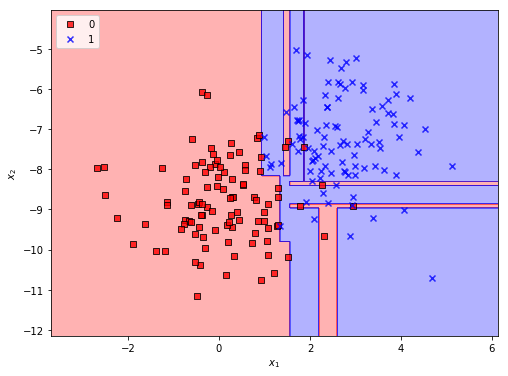

In [18]:
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=200, centers=2, random_state=125)

# TO DO: Split the data into 80 % train and 20% test using train_test_split
# Set random_state=123  to obtain reproducible results
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=123)

# TO DO: Instantiate a decision tree classifier and fit it to X_train and y_train
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

# TO DO: Evaluate the model performance (accuracy) on the train and test sets
train_score = tree.score(X_train, y_train)
print(train_score)
test_score = tree.score(X_test, y_test)
print(test_score)

# Plot the decision regions
plot_decision_regions(X,y, tree)
plt.legend(loc='upper left')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Observe how the tree overfits the data!

### Ensemble Methods

As presentated in the slides, ensemble methods aggregate the predictions of a group of trees in a robust way. Let's fit a Bagging classifier and a Random Forest Classifier to the classification dataset we defined above. 

RF train score:  1.0
RF test score:  0.95
RF train score:  1.0
RF test score:  0.95


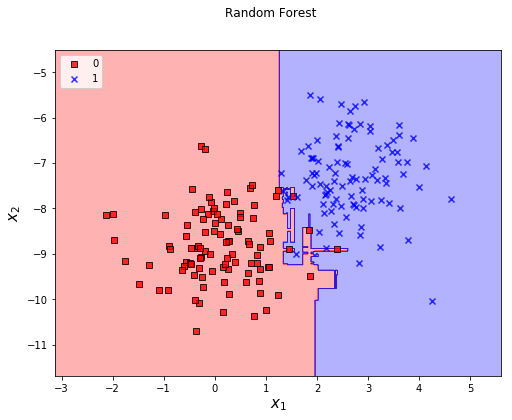

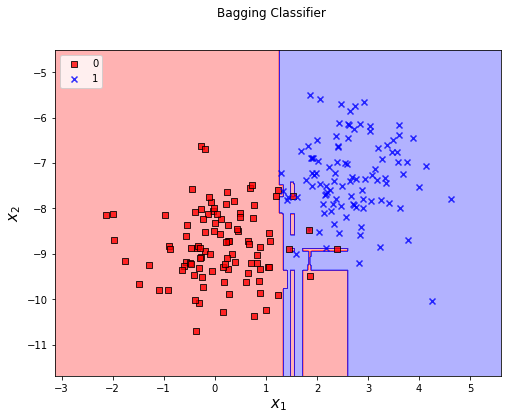

In [19]:
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier)

X, y = make_blobs(n_samples=200, centers=2, cluster_std=0.8, random_state=125)
X_train, X_test, y_train, y_test= \
train_test_split(X,y, test_size=0.2, random_state=123)

# TO DO: Instantiate a Bagging classifier (name it Bag_clf) and a Random
# Forest classifier(name it RF); both take the argument n_estimators = 100

RF = RandomForestClassifier(n_estimators = 100, random_state=123)
Bag_clf = BaggingClassifier(n_estimators = 100, random_state=123)

# Fit the estimators to X_train and y_train and plot the decison region for
# each classifier
RF.fit(X_train,y_train)
Bag_clf.fit(X_train,y_train)

# TO DO: Evaluate both models on the train and test sets
RF_train_score = RF.score(X_train, y_train)
RF_test_score = RF.score(X_test, y_test)
print("RF train score: ", RF_train_score)
print("RF test score: ", RF_test_score)

Bag_clf_train_score = Bag_clf.score(X_train, y_train)
Bag_clf_test_score = Bag_clf.score(X_test, y_test)
print("RF train score: ", Bag_clf_train_score)
print("RF test score: ", Bag_clf_test_score)

# Plot the decision regions
plot_decision_regions(X,y, RF)
plt.suptitle('Random Forest')
plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.show()

plt.clf()

plot_decision_regions(X,y, Bag_clf)
plt.suptitle('Bagging Classifier')
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.legend(loc='upper left')
plt.show()

### Cross-validation

K-fold cross-validation is the gold standard used to evaluate the skill of a model on small- to medium-sized datasets. Let's go ahead and evaluate each of the models we defined earlier on the make_blobs dataset. The winning model is the one with the highest mean cross-validation f1 score.

In [20]:
from sklearn.model_selection import (StratifiedKFold, cross_val_score)

rnd = 123
models = {'LR': LogisticRegression(random_state= rnd),
       'DT': DecisionTreeClassifier(random_state=rnd),
       'BC': BaggingClassifier(random_state=rnd),
       'RF': RandomForestClassifier(random_state=rnd)}

# TO DO: Iterate over the items of models
# refer to the key as 'name' and to the value as 'model' 
for name, model in models.items():
    # Instantiate a StratifiedKFold() split and name it kfold with the parameter n_split= 10
    kfold = StratifiedKFold(n_splits=10, random_state=rnd)
    # Generate a list of CV scores using cross_val_score use the parameters cv= kfold and scoring='f1
    model_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1' )
    # Print the name of the model and the mean CV f1 score
    print("Mean f1 CV Score of %s is %.2f" %(name, model_scores.mean()))

Mean f1 CV Score of BC is 0.93
Mean f1 CV Score of LR is 0.96
Mean f1 CV Score of DT is 0.92
Mean f1 CV Score of RF is 0.93


After chossing the best scoring CV model we fit it on the entire training set and then evaluate it on the test set.

In [21]:
LR_model = models['LR'].fit(X_train,y_train)
print("Train score: ", LR_model.score(X_train,y_train))
print("Test score: ", LR_model.score(X_test, y_test))

Train score:  0.95625
Test score:  0.95


### Hyperparameter Tuning

When we fit a model on a dataset as we did in the cells above, we do not necessarily obtain the model's best skills. This is because we are not using the optimal hyperparameters of the model. The ones set by default by the authors and developers of scikit-learn are not necessarily the optimal hyperparameters of the model for our specific problem. In order to inspect the hyperparameters of a model we can use the method .get_params() as follows.

In [22]:
model = RandomForestClassifier(random_state = rnd)
model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

Once we know which hyperparameters we want to tune, we can define a python dictionary whose keys correspond to the names of the hyperparameters and whose values are lists containing the values to be searched. This dictionary is passed to the function GridSearchCV which performs a brute force search using stratified K-fold CV. We can set the number of folds with the 'cv' argument. We can also choose the scoring metric that suits our problem with the "scoring" argument.

After we fit the GridSearchCV object, we can retreive the optimal model using the attribute ".best_estimator_". 

In [24]:
from sklearn.model_selection import GridSearchCV
import pickle # Pickle the best model

RF_grid = {
    'max_depth': [1,2,3,4],
    'criterion': ['gini', 'entropy'],
    'n_estimators' : [100, 200, 300]
}

RFgrid = GridSearchCV(estimator= RF , param_grid= RF_grid ,
             scoring = 'f1', cv= 10, n_jobs=-1)

RFgrid.fit(X_train,y_train)

print("Best params", RFgrid.best_params_)
print("Best score", RFgrid.best_score_)

best_estimator = RFgrid.best_estimator_


Best params {'max_depth': 1, 'criterion': 'gini', 'n_estimators': 100}
Best score 0.975735294118


In [25]:
best_estimator.fit(X_train,y_train)
print("Train score: ", best_estimator.score(X_train,y_train))
print("Test score: ", best_estimator.score(X_test,y_test))

# Save the best model by pickling it
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_estimator, f)

Train score:  0.975
Test score:  1.0


Later on, we can reload the best model with pickle.load as shown in the snippet below.

In [26]:
# later on load the model

with open('best_model.pkl','rb') as f:
    best_model = pickle.load(f)    
    
print(best_model.get_params())    

{'n_estimators': 100, 'min_samples_leaf': 1, 'n_jobs': 1, 'oob_score': False, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'max_depth': 1, 'warm_start': False, 'min_samples_split': 2, 'max_features': 'auto', 'class_weight': None, 'bootstrap': True, 'verbose': 0, 'criterion': 'gini', 'min_impurity_split': None, 'max_leaf_nodes': None}
